# Market segmentation - case study on Mcdonalds

In [8]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

# Step 4: Exploring the Data 

In [9]:

# Load dataset 
df = pd.read_csv("mcdonalds.csv")

# Displaying basic information
print(df.info())
print(df.head())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB
None
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No

In [10]:
# Getting dataset dimensions (rows, columns)
df.shape

(1453, 15)

# Step 5: Extracting Market Segments (Using K-Means Clustering)

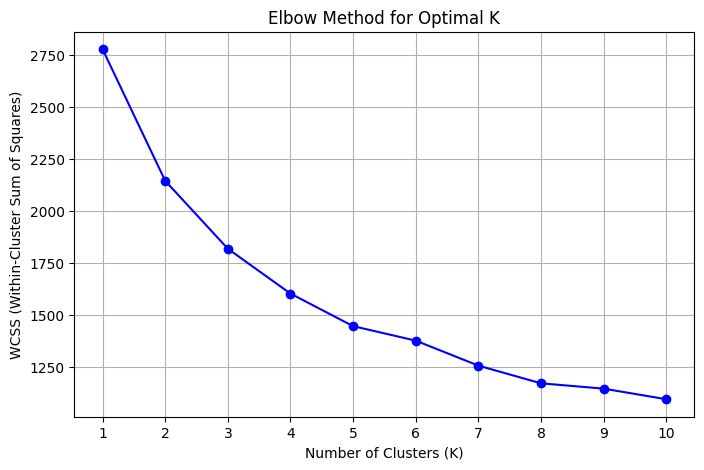

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
X = df[features].apply(lambda x: x.map({'Yes': 1, 'No': 0}))  # Converting categorical to numerical


# Range of clusters to test
wcss = []  # Store WCSS values
k_values = range(1, 11)  # Testing K values from 1 to 10

# Compute WCSS for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)  # X is the dataset with numerical features
    wcss.append(kmeans.inertia_)  # Inertia = WCSS (sum of squared distances)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.xticks(k_values)  # Set K values as x-ticks
plt.grid(True)
plt.show()


In [12]:
from sklearn.cluster import KMeans
import numpy as np

# Selecting relevant features for clustering (excluding demographic data)
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
X = df[features].apply(lambda x: x.map({'Yes': 1, 'No': 0}))  # Converting categorical to numerical

# Apply K-Means clustering with 4 segments (as in the case study)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X)

# Displaying cluster centers
print(pd.DataFrame(kmeans.cluster_centers_, columns=features))


      yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  0.822335    0.969543  0.065990   0.756345  0.065990  0.868020  0.050761   
1  0.856905    0.985025  0.109817   0.833611  0.440932  0.961730  0.970050   
2  0.359420    0.794203  0.104348   0.953623  0.855072  0.788406  0.040580   
3  0.006452    0.845161  0.067742   0.906452  0.619355  0.925806  0.848387   

      tasty  expensive   healthy  disgusting  
0  0.908629   0.771574  0.365482    0.020305  
1  0.975042   0.039933  0.304493    0.053245  
2  0.437681   0.947826  0.028986    0.484058  
3  0.064516   0.054839  0.077419    0.483871  


# Step 6: Profiling Market Segments


C:\Users\hp\AppData\Local\Temp\ipykernel_9520\623564504.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[features] = df[features].replace({'Yes': 1, 'No': 0})


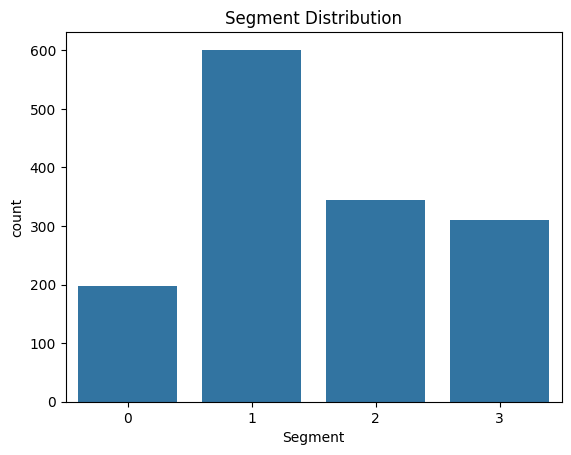

            yummy  convenient     spicy  fattening    greasy      fast  \
Segment                                                                  
0        0.822335    0.969543  0.065990   0.756345  0.065990  0.868020   
1        0.856905    0.985025  0.109817   0.833611  0.440932  0.961730   
2        0.359420    0.794203  0.104348   0.953623  0.855072  0.788406   
3        0.006452    0.845161  0.067742   0.906452  0.619355  0.925806   

            cheap     tasty  expensive   healthy  disgusting  
Segment                                                       
0        0.050761  0.908629   0.771574  0.365482    0.020305  
1        0.970050  0.975042   0.039933  0.304493    0.053245  
2        0.040580  0.437681   0.947826  0.028986    0.484058  
3        0.848387  0.064516   0.054839  0.077419    0.483871  


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Converting categorical responses to numerical (Yes = 1, No = 0)
df[features] = df[features].replace({'Yes': 1, 'No': 0})

# performming aggregation without error
segment_profiles = df.groupby("Segment")[features].mean()

# Plotting segment distributions
sns.countplot(x="Segment", data=df)
plt.title("Segment Distribution")
plt.show()

# Analyzing segment attributes
segment_profiles = df.groupby("Segment")[features].mean()
print(segment_profiles)


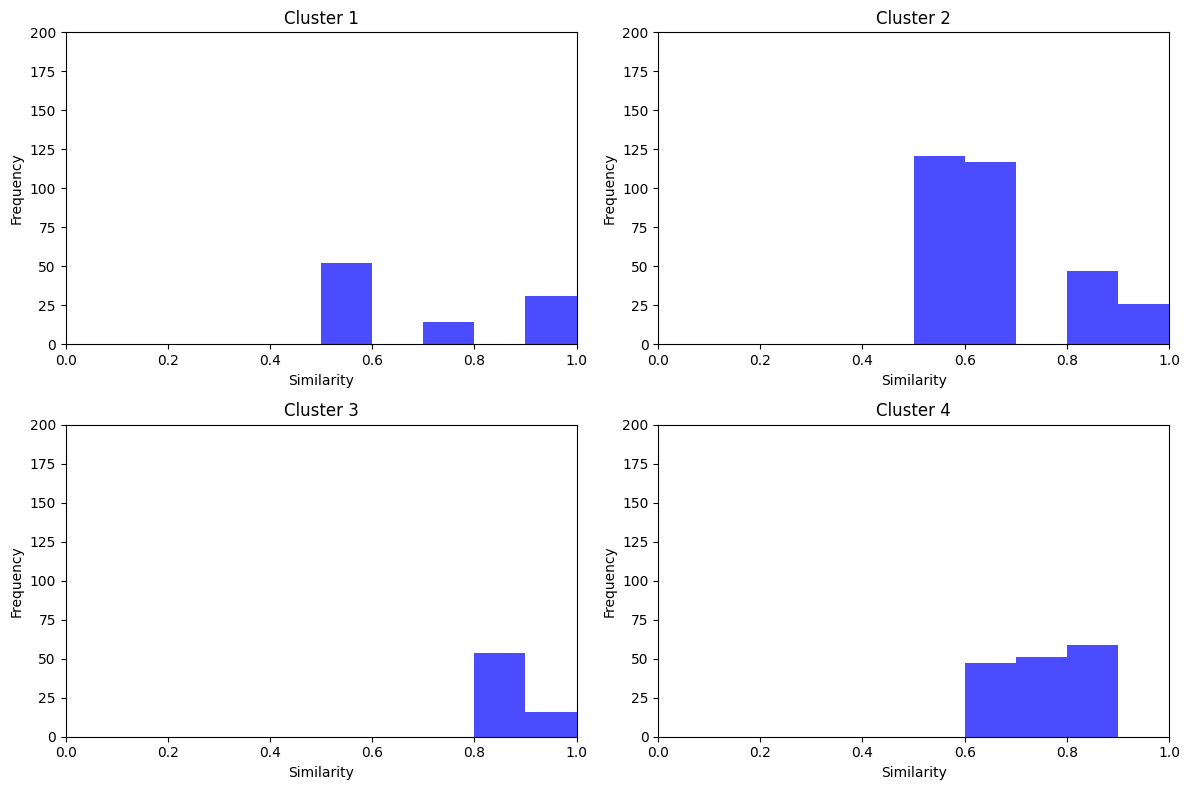

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define parameters
range_values = (0, 1)
num_bins = 10
max_frequency = 200

# Creating a 2x2 subplot for 4 clusters
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(1, 5):  # Clusters 1 to 4
    labels = kmeans.labels_  # Cluster labels assigned by KMeans
    similarities = np.min(kmeans.transform(X), axis=1)  # Compute similarity (distance to closest centroid)

    row = (i - 1) // 2
    col = (i - 1) % 2

    # Plot histogram for each cluster
    axs[row, col].hist(similarities[labels == (i - 1)], bins=num_bins, range=range_values, color='blue', alpha=0.7)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Cluster {i}')

    # Set limits and ticks
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)
    axs[row, col].set_xticks(np.linspace(0, 1, 6))

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

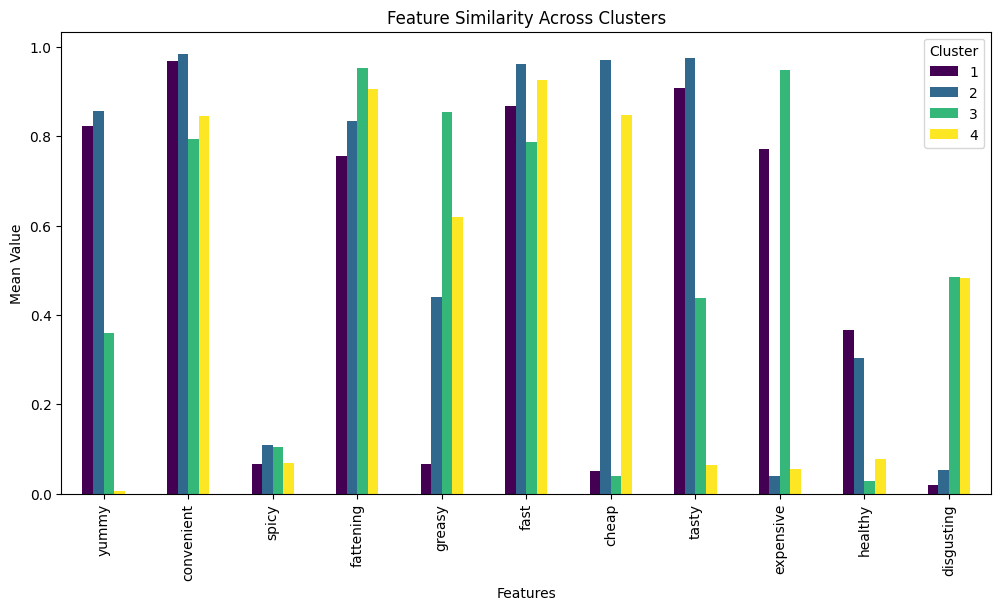

C:\Users\hp\AppData\Local\Temp\ipykernel_9520\1182313084.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency.index, y=frequency.values, palette="coolwarm")


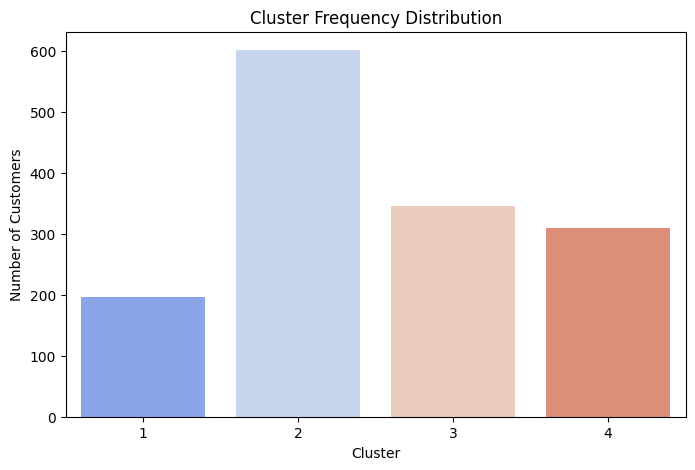

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

df["Segment"] = df["Segment"] + 1

# Compute similarity (mean values of features for each cluster)
similarity = df.groupby("Segment")[features].mean()

# Compute frequency (number of data points in each cluster)
frequency = df["Segment"].value_counts().sort_index()

# Plot similarity bar chart
plt.figure(figsize=(12, 6))
similarity.T.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Feature Similarity Across Clusters")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.legend(title="Cluster")
plt.show()

# Plot frequency bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=frequency.index, y=frequency.values, palette="coolwarm")
plt.title("Cluster Frequency Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_9520\3515709490.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Similarity", data=df_boxplot, palette="coolwarm")


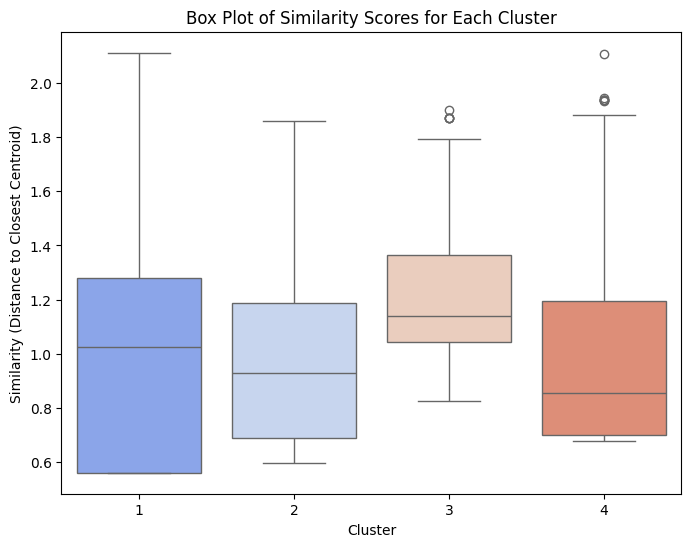

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Compute similarities (distance to closest centroid) for each cluster
similarities = np.min(kmeans.transform(X), axis=1)

# Create a DataFrame with Cluster labels and Similarities
df_boxplot = pd.DataFrame({
    "Cluster": kmeans.labels_ + 1,  # Convert cluster labels (0-3) to (1-4)
    "Similarity": similarities
})

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Cluster", y="Similarity", data=df_boxplot, palette="coolwarm")

# Customize labels and title
plt.xlabel("Cluster")
plt.ylabel("Similarity (Distance to Closest Centroid)")
plt.title("Box Plot of Similarity Scores for Each Cluster")
plt.xticks(ticks=[0, 1, 2, 3], labels=["1", "2", "3", "4"])  # Ensure correct labeling

# Show the plot
plt.show()


# Step 7: Describing Market Segments


               Age  VisitFrequency
Segment                           
1        43.949239             NaN
2        43.164725             NaN
3        43.585507             NaN
4        48.948387             NaN
               Age  VisitFrequency
Segment                           
1        43.949239             NaN
2        43.164725             NaN
3        43.585507             NaN
4        48.948387             NaN


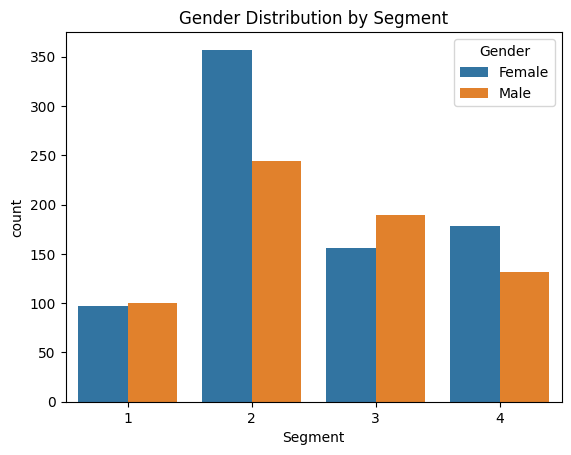

In [17]:
# Converting Age and VisitFrequency to numeric 
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")  # Convert Age column
df["VisitFrequency"] = pd.to_numeric(df["VisitFrequency"], errors="coerce")  # Convert VisitFrequency column

# Grouping by Segment and calculate the mean
segment_summary = df.groupby("Segment")[["Age", "VisitFrequency"]].mean()

# Display segment-wise summary
print(segment_summary)

# Comparing average age and visit frequency across segments
print(df.groupby("Segment")[["Age", "VisitFrequency"]].mean())


# Visualizing gender distribution per segment
sns.countplot(x="Segment", hue="Gender", data=df)
plt.title("Gender Distribution by Segment")
plt.show()


# Step 8: Selecting the Target Segment

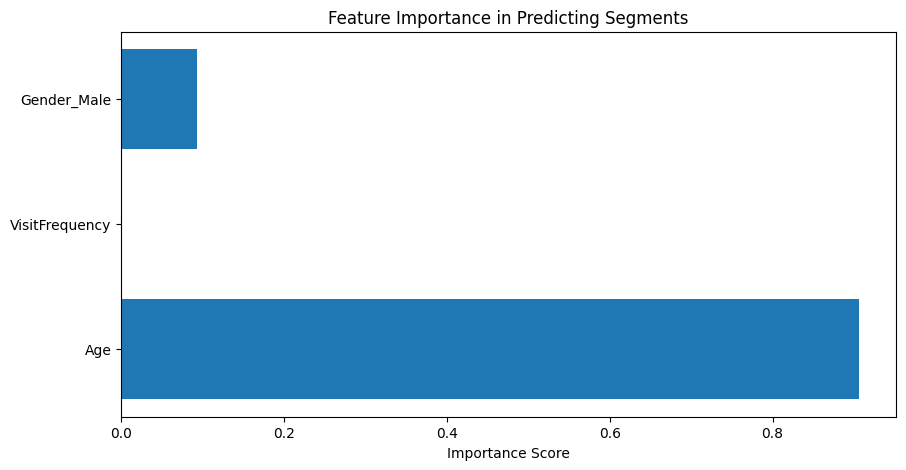

In [18]:
# Step 8: Selecting Target Segments using Decision Tree
from sklearn.tree import DecisionTreeClassifier

descriptor_vars = ["Age", "VisitFrequency", "Gender"]
X = pd.get_dummies(df[descriptor_vars], drop_first=True)
y = df["Segment"]

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(X.columns, tree.feature_importances_)
plt.xlabel("Importance Score")
plt.title("Feature Importance in Predicting Segments")
plt.show()

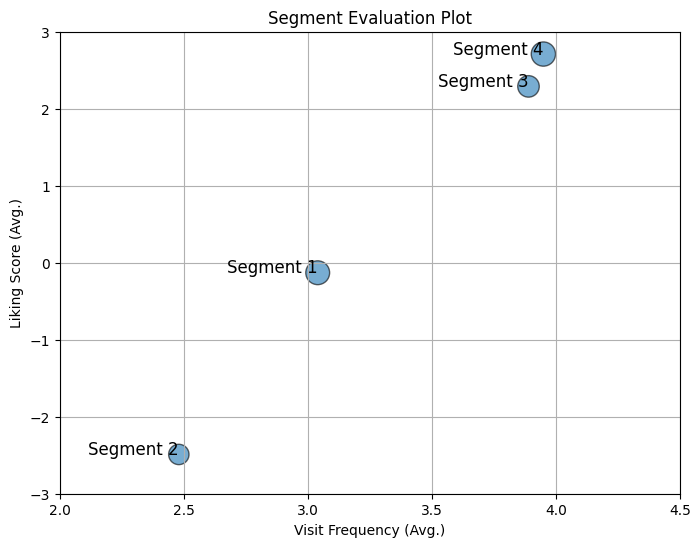

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data 
segment_labels = ["Segment 1", "Segment 2", "Segment 3", "Segment 4"]
visit_frequency = [3.04, 2.48, 3.89, 3.95]  # Average visit frequency per segment
liking_score = [-0.13, -2.49, 2.29, 2.71]  # Average liking score per segment
female_percentage = [0.59, 0.43, 0.48, 0.61]  # Percentage of female customers

# bubble sizes for visualization
bubble_size = [f * 500 for f in female_percentage]  

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(visit_frequency, liking_score, s=bubble_size, alpha=0.6, edgecolors="black")

# Adding segment labels
for i, label in enumerate(segment_labels):
    plt.text(visit_frequency[i], liking_score[i], label, fontsize=12, ha='right')

# plot labels and limits
plt.xlabel("Visit Frequency (Avg.)")
plt.ylabel("Liking Score (Avg.)")
plt.title("Segment Evaluation Plot")
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Showing plot
plt.grid(True)
plt.show()
